# First fastai

In [1]:
from fastai.vision.all import *
path= untar_data(URLs.PETS)/'images'

In [2]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [3]:
learn= cnn_learner(dls, resnet34, metrics=error_rate)

/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [4]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

In [5]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166147,0.022917,0.010149,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.072152,0.025713,0.006766,00:16


In [9]:
#learn.fit_one_cycle(1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11.4 µs


predict= ('True', tensor(1), tensor([1.5341e-13, 1.0000e+00]))


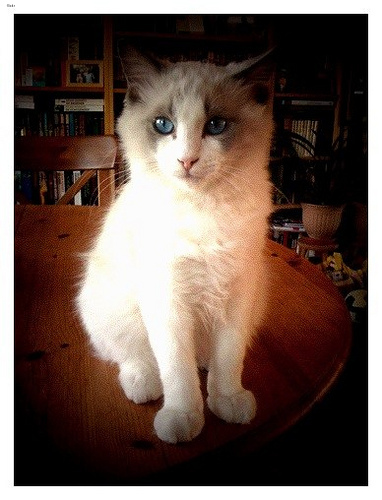

In [10]:
%time
img = dls.dataset[0][0]
print(f'predict= {learn.predict(img)}')
img

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 14.3 µs


predict= ('False', tensor(0), tensor([1.0000e+00, 3.2877e-08]))


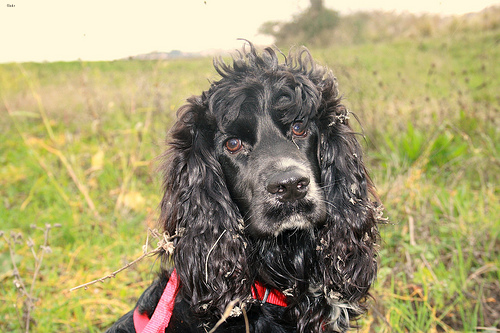

In [11]:
%time
img = dls.dataset[1][0]
print(f'predict= {learn.predict(img)}')
img

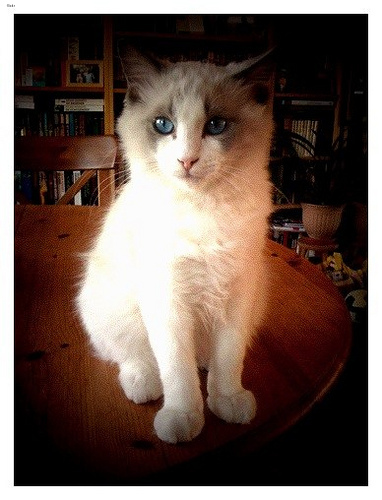

In [24]:
dls.train_ds[0][0]

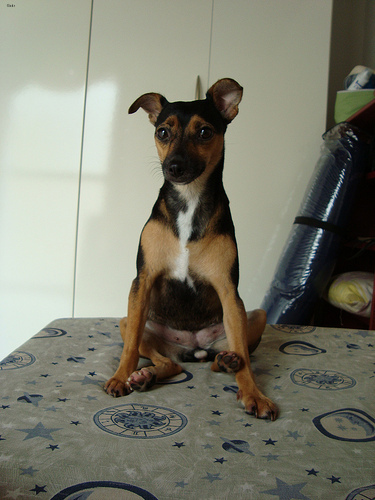

In [25]:
dls.valid_ds[0][0]